In [1]:
from qiskit import*
from math import*
import numpy as np
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram, plot_bloch_multivector
sim = Aer.get_backend('aer_simulator')
from qiskit.providers.aer import QasmSimulator
import qiskit.quantum_info as qi

In [2]:
#Validating the initial states

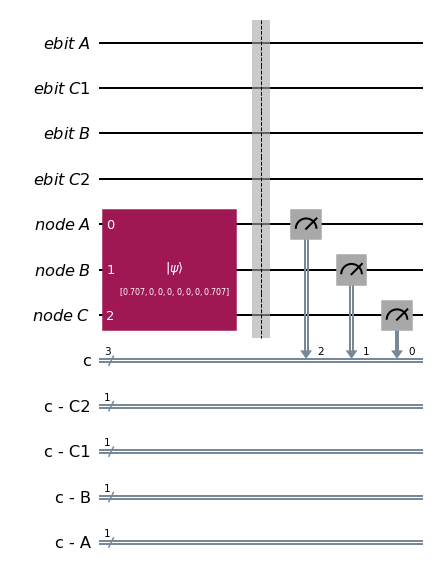

In [3]:

q1 = QuantumRegister(1,'ebit A')
q2 = QuantumRegister(1,'ebit C1')
q3 = QuantumRegister(1,'ebit B')
q4 = QuantumRegister(1,'ebit C2')
q5 = QuantumRegister(1,'node A')
q6 = QuantumRegister(1,'node B')
q7 = QuantumRegister(1,'node C')

c1 = ClassicalRegister(1,'c - A')
c2 = ClassicalRegister(1,'c - B')
c3 = ClassicalRegister(1,'c - C1')
c4 = ClassicalRegister(1,'c - C2')

qc = QuantumCircuit(0,3)
qc.add_register(q1)
qc.add_register(q2)
qc.add_register(q3)
qc.add_register(q4)
qc.add_register(q5)
qc.add_register(q6)
qc.add_register(q7)
qc.add_register(c4)
qc.add_register(c3)
qc.add_register(c2)
qc.add_register(c1)


#step 1: Making input states
initial_state = [1/sqrt(2),0,0,0,0,0,0,1/sqrt(2)]
qc.initialize(initial_state, [4,5,6])

qc.save_statevector() 

qc.measure([4,5,6],[2,1,0])
qc.draw(output='mpl',style = 'iqx')

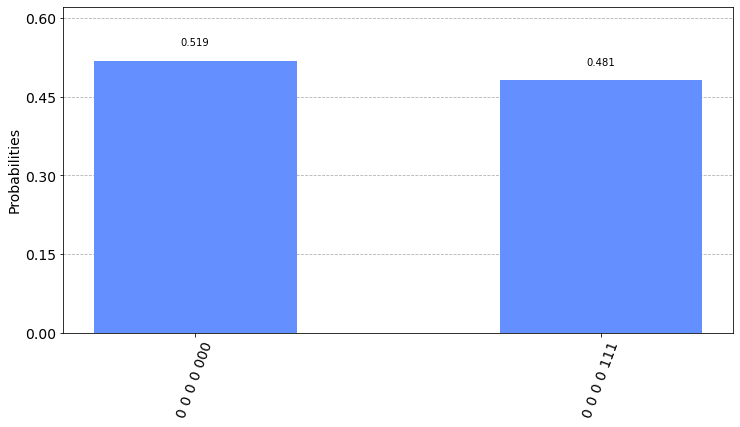

In [4]:
qobj = assemble(qc) 
counts = sim.run(qobj).result().get_counts() 
plot_histogram(counts,figsize=(12,6))

In [5]:
#Protocol to implement Toffoli gate using Maximally entangled state

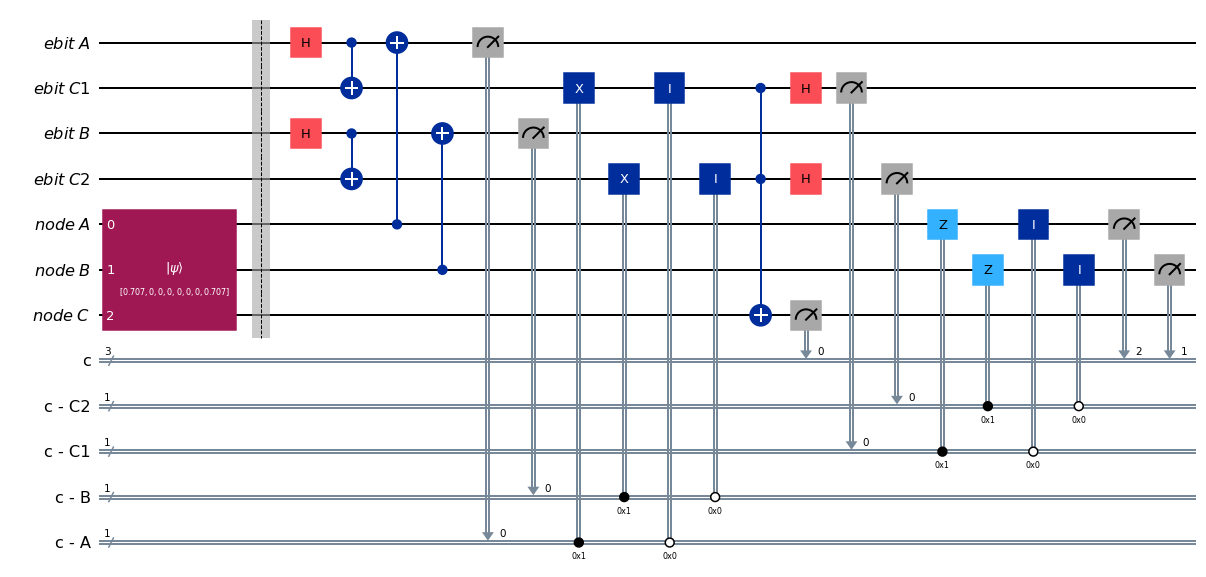

In [7]:
q1 = QuantumRegister(1,'ebit A')
q2 = QuantumRegister(1,'ebit C1')
q3 = QuantumRegister(1,'ebit B')
q4 = QuantumRegister(1,'ebit C2')
q5 = QuantumRegister(1,'node A')
q6 = QuantumRegister(1,'node B')
q7 = QuantumRegister(1,'node C')

c1 = ClassicalRegister(1,'c - A')
c2 = ClassicalRegister(1,'c - B')
c3 = ClassicalRegister(1,'c - C1')
c4 = ClassicalRegister(1,'c - C2')

qc = QuantumCircuit(0,3)
qc.add_register(q1)
qc.add_register(q2)
qc.add_register(q3)
qc.add_register(q4)
qc.add_register(q5)
qc.add_register(q6)
qc.add_register(q7)
qc.add_register(c4)
qc.add_register(c3)
qc.add_register(c2)
qc.add_register(c1)

#step 1: Making input states
initial_state = [1/sqrt(2),0,0,0,0,0,0,1/sqrt(2)]
qc.initialize(initial_state, [4,5,6])
qc.save_statevector() 

# step 2: Making Maximally entangled states
qc.h([0,2])
qc.cx([0,2],[1,3])

#step 3: CNOT btwn (A1 and A) & (B1 and B) 
qc.cx([4,5],[0,2])

#step 4: Measuring A, B in Z-basis
qc.measure(0,c1)
qc.x(1).c_if(c1, 1)
qc.id(1).c_if(c1, 0)

qc.measure(2,c2)
qc.x(3).c_if(c2, 1)
qc.id(3).c_if(c2, 0)

#step 5: Toffoli btwn C, C1 and C2
qc.ccx(1, 3, 6)

#step 6: Measuring B in X-basis after hadamarding
qc.h([1,3])
qc.measure(1,c3)
qc.z(4).c_if(c3, 1)
qc.id(4).c_if(c3, 0)

qc.measure(3,c4)
qc.z(5).c_if(c4, 1)
qc.id(5).c_if(c4, 0)


qc.measure([4,5,6],[2,1,0])
qc.draw(output='mpl', style='iqx')#.savefig('tripartite-mes.svg',dpi=600)

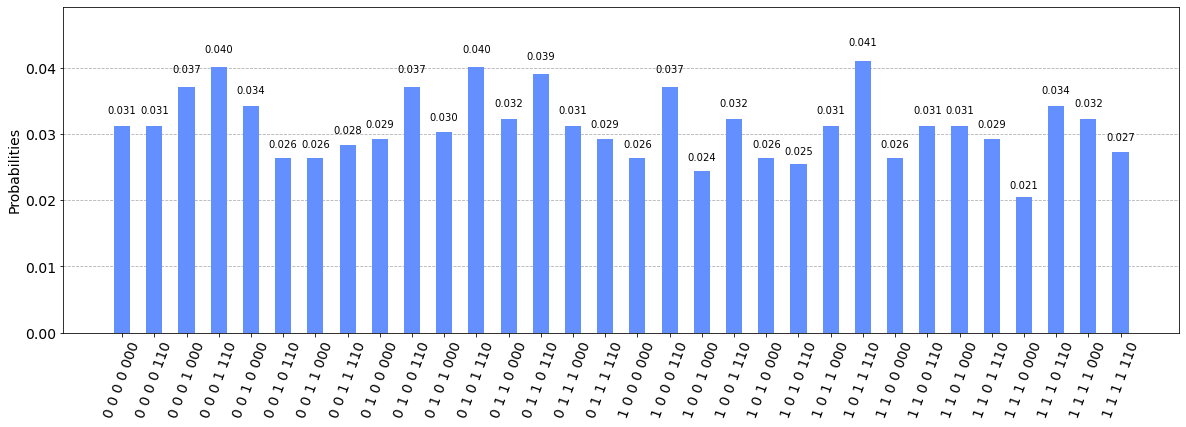

In [9]:
qobj = assemble(qc) 
counts = sim.run(qobj).result().get_counts() 
plot_histogram(counts,figsize=(20,6))

In [10]:
#Protocol using Non-maximally entangled states

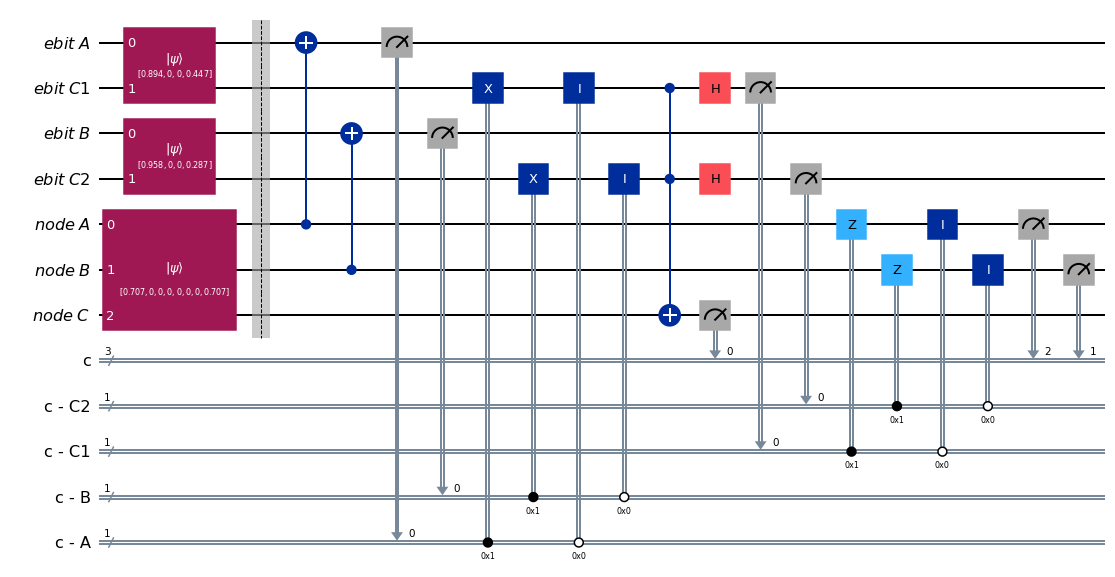

In [15]:
q1 = QuantumRegister(1,'ebit A')
q2 = QuantumRegister(1,'ebit C1')
q3 = QuantumRegister(1,'ebit B')
q4 = QuantumRegister(1,'ebit C2')
q5 = QuantumRegister(1,'node A')
q6 = QuantumRegister(1,'node B')
q7 = QuantumRegister(1,'node C')

c1 = ClassicalRegister(1,'c - A')
c2 = ClassicalRegister(1,'c - B')
c3 = ClassicalRegister(1,'c - C1')
c4 = ClassicalRegister(1,'c - C2')

qc = QuantumCircuit(0,3)
qc.add_register(q1)
qc.add_register(q2)
qc.add_register(q3)
qc.add_register(q4)
qc.add_register(q5)
qc.add_register(q6)
qc.add_register(q7)
qc.add_register(c4)
qc.add_register(c3)
qc.add_register(c2)
qc.add_register(c1)

#step 1: Making input states
initial_state = [1/sqrt(2),0,0,0,0,0,0,1/sqrt(2)]
qc.initialize(initial_state, [4,5,6]) 

# step 2: Making Non-maximally entangled states
a = 0.5
initial_state_1 = 1/sqrt(1+a*a)*np.array([1,0,0,a])
qc.initialize(initial_state_1, [0,1])

b = 0.3
initial_state_2 = 1/sqrt(1+b*b)*np.array([1,0,0,b])
qc.initialize(initial_state_2, [2,3])

qc.save_statevector()

#step 3: CNOT btwn (A1 and A) & (B1 and B) 
qc.cx([4,5],[0,2])

#step 4: Measuring A, B in Z-basis
qc.measure(0,c1)
qc.x(1).c_if(c1, 1)
qc.id(1).c_if(c1, 0)

qc.measure(2,c2)
qc.x(3).c_if(c2, 1)
qc.id(3).c_if(c2, 0)

#step 5: Toffoli btwn C, C1 and C2
qc.ccx(1, 3, 6)

#step 6: Measuring B in X-basis after hadamarding
qc.h([1,3])
qc.measure(1,c3)
qc.z(4).c_if(c3, 1)
qc.id(4).c_if(c3, 0)

qc.measure(3,c4)
qc.z(5).c_if(c4, 1)
qc.id(5).c_if(c4, 0)


qc.measure([4,5,6],[2,1,0])
qc.draw(output='mpl', style='iqx')#.savefig('tripartite-nmes.svg',dpi=600)

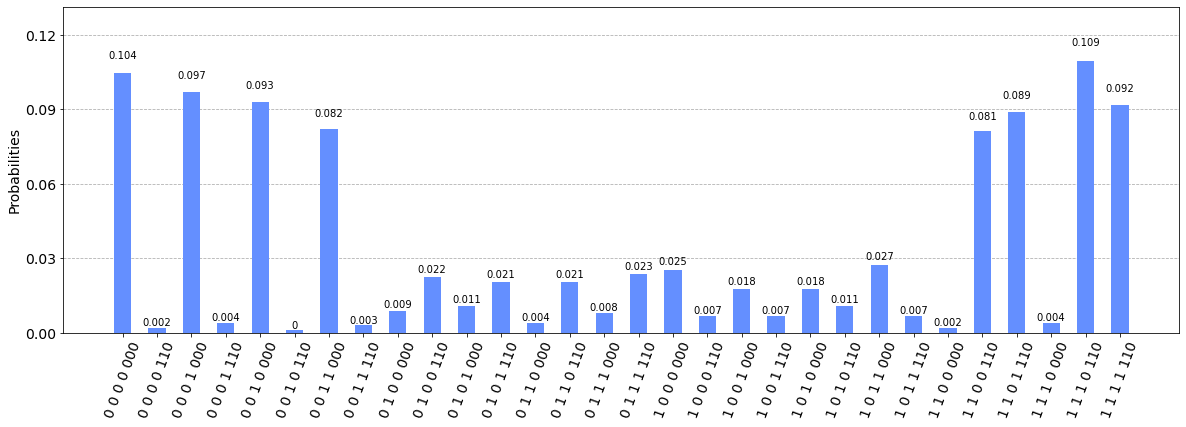

In [16]:
qobj = assemble(qc) 
counts = sim.run(qobj).result().get_counts() 
plot_histogram(counts,figsize=(20,6))